In [1]:
from IPython.display import Image

----------------
## PANDAS - Essential basic functionality
------------


In [2]:
import numpy as np
import pandas as pd

##### Head and tail

To view a small sample of a Series or DataFrame object, use the head() and tail() methods. The default number of elements to display is 5, but you may pass a custom number.

In [3]:
long_series = pd.Series(np.random.randn(1000))

In [6]:
long_series.head(7)

0   -1.165062
1   -0.632983
2   -0.240181
3   -0.651217
4    3.273970
5   -0.115198
6    2.323094
dtype: float64

In [7]:
long_series.tail(3)

997   -1.491650
998   -1.895230
999    0.072216
dtype: float64

##### Attributes and underlying data

pandas objects have a number of attributes enabling you to access the metadata

- `shape`: gives the axis dimensions of the object, consistent with ndarray
- `Axis` labels
    - Series: index (only axis)
    - DataFrame: index (rows) and columns

In [5]:
index = pd.date_range("1/1/2000", periods=8)

s     = pd.Series(np.random.randn(5),       index=["a", "b", "c", "d", "e"])
df    = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

In [6]:
df

,A,B,C
2000-01-01,-0.470224,-0.706120,1.815960
2000-01-02,0.517503,0.727751,-0.121242
2000-01-03,-1.739286,0.250074,0.389964
2000-01-04,-0.785565,-0.252164,-0.477757
2000-01-05,-0.202866,1.107877,0.275027
2000-01-06,0.146641,-0.893142,1.047377
2000-01-07,1.457511,0.116529,-0.241677
2000-01-08,0.765432,1.692164,-0.417898


In [7]:
df.shape

(8, 3)

data types ...

In [8]:
df.dtypes

A    float64
B    float64
C    float64
dtype: object

information on the dataframes ...

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2000-01-01 to 2000-01-08
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       8 non-null      float64
 1   B       8 non-null      float64
 2   C       8 non-null      float64
dtypes: float64(3)
memory usage: 256.0 bytes


#### Handling missing values

In `applied data science`, you will usually have `missing` data. For example, an industrial application with sensors will have sensor data that is missing on certain days.

You have a couple of alternatives to work with missing data. You can:

- Drop the whole row
- Fill the row-column combination with some value

Dropping rows/columns based on missing values is a complex exercise, often requires joint consultation with Data Engg and Data Science teams

`NaN means missing data` - Missing data is labelled NaN.

Note that `np.nan` is not equal to Python `None`. 

In [12]:
df = pd.DataFrame([np.arange(1,4)], index=['a','b','c'], columns=["X","Y","Z"]) 
df

,X,Y,Z
a,1,2,3
b,1,2,3
c,1,2,3


Now `reindex` this array adding an index `d`. Since d has no value it is filled with NaN.

In [13]:
df = df.reindex(index=['a','b','c','d'], )
df

,X,Y,Z
a,1.0,2.0,3.0
b,1.0,2.0,3.0
c,1.0,2.0,3.0
d,NaN,NaN,NaN


`isna`- Now use isna to check for missing values.

In [14]:
pd.isna(df)

,X,Y,Z
a,False,False,False
b,False,False,False
c,False,False,False
d,True,True,True


`dropna` by default drops any row containing a missing value:

In [15]:
df.dropna()

,X,Y,Z
a,1.0,2.0,3.0
b,1.0,2.0,3.0
c,1.0,2.0,3.0


In [16]:
# Data Cleaning and Preparation
from numpy import nan as NA
df = pd.DataFrame([[1., 6.5, 3.], 
                   [1.,NA ,NA ],
                   [NA,NA ,NA ], 
                   [NA, 6.5, 3.]], columns = ['c1', 'c2', 'c3'])
df

,c1,c2,c3
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


Passing how='all' will only drop rows that are all NA:

In [17]:
df.dropna(how='all')

,c1,c2,c3
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


- count number of missing values in each column
- sum True's

In [18]:
df.isnull()

,c1,c2,c3
0,False,False,False
1,False,True,True
2,True,True,True
3,True,False,False


In [19]:
df.isnull().sum()

c1    2
c2    2
c3    2
dtype: int64

percentage of the null values in the total values of the column.

In [20]:
percentage = 100 * df.isnull().sum() / len(df)
percentage

c1    50.0
c2    50.0
c3    50.0
dtype: float64

Drop columns based on `threshold`

- Thresh = 1 means that it `keeps` the columns which at least contain 1 NON NA-value. 
- Thresh = 2 means that it `keeps` the columns which atleast contain 2 NON NA-value.

- thresh=0.7 * len(data_frame))=> Keep all those columns with 70% Non-na values.

In [130]:
df.dropna(axis=1, thresh=0.45 * len(df))

,c1,c2,c3
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


#### Descriptive statistics
- There exists a large number of methods for `computing descriptive statistics` and other related operations on Series, DataFrame. 

- Most of these are `aggregations` (hence producing a lower-dimensional result) like `sum()`, `mean()`, and `quantile()`, but some of them, like cumsum() and cumprod(), produce an object of the same size. 

- Generally speaking, these methods take an `axis` argument, just like ndarray.{sum, std, …}, but the axis can be specified by name or integer:

    - `Series`: no axis argument needed
    - `DataFrame`: “index” (axis=0, default), “columns” (axis=1)
    
    
- 1. `Central tendency` — mean, median, mode
- 2. `Dispersion` — variance, standard deviation, range, interquartile range(IQR)
- 3. `Skewness` — symmetry of data along with mean value
- 4. `Kurtosis` — peakedness of data at mean value

> Key Note: Use statistics to understand the column spread or columns relationship (NOTHING BEYOND)

- e.g. the column data should be normally distributed.
    - this is really not needed if we are using ML
    - ML (the way the algorithms are written, the aberrations in the data can be absorbed)

In [10]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}

df = pd.DataFrame(data, columns = ['name', 'age', 'preTestScore', 'postTestScore'])
df

,name,age,preTestScore,postTestScore
0,Jason,42,4,25
1,Molly,52,24,94
2,Tina,36,31,57
3,Jake,24,2,62
4,Amy,73,3,70


`Central tendency — mean, median, mode`

The sum of all the ages

In [11]:
df['age'].sum()

227

Mean preTestScore

In [12]:
df['preTestScore'].mean()

12.8

Cumulative sum of preTestScores, moving from the rows from the top

In [13]:
df['preTestScore'].cumsum()

0     4
1    28
2    59
3    61
4    64
Name: preTestScore, dtype: int64

Summary statistics

In [14]:
df.describe()

,age,preTestScore,postTestScore
count,5.000000,5.000000,5.000000
mean,45.400000,12.800000,61.600000
std,18.460769,13.663821,24.905823
min,24.000000,2.000000,25.000000
25%,36.000000,3.000000,57.000000
50%,42.000000,4.000000,62.000000
75%,52.000000,24.000000,70.000000
max,73.000000,31.000000,94.000000


Minimum value of preTestScore

In [24]:
df['preTestScore'].min()

2

In [25]:
df['preTestScore'].max()

31

In [26]:
df['preTestScore'].median()

4.0

In [27]:
df['preTestScore'].mean()

12.8

`Dispersion — variance, standard deviation, range, interquartile range(IQR)`

##### `Variance`
The sample variance quantifies the spread of the data. It shows numerically how far the data points are from the mean.

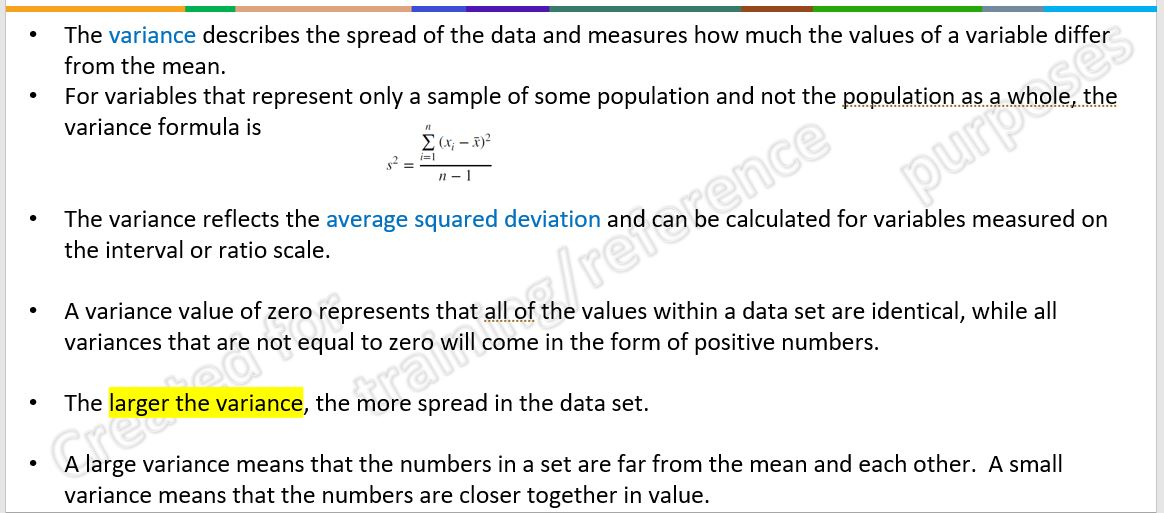

In [28]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-25.JPG', width=800)

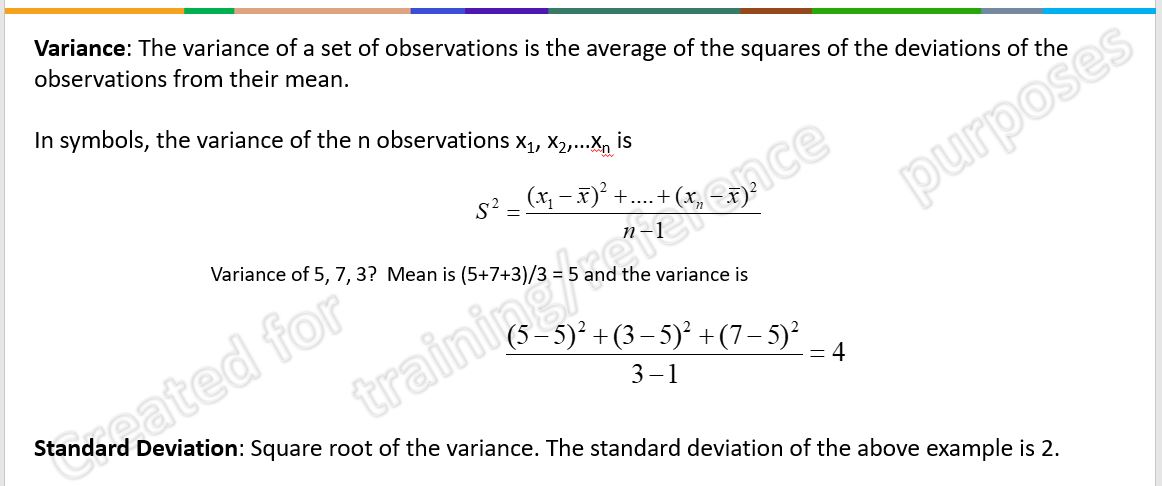

In [37]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-26.JPG', width=800)

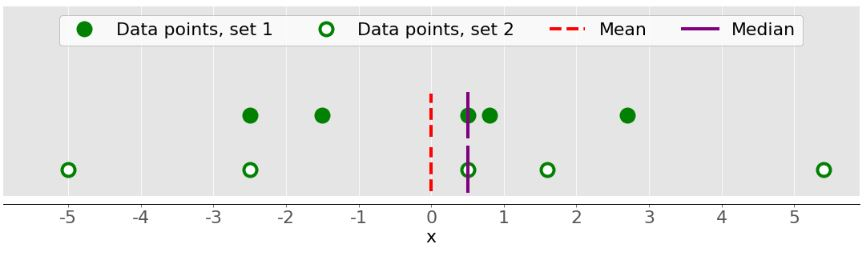

In [38]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-46.JPG', width=800)

There are two datasets in this figure:

- Green dots: This dataset has a smaller variance or a smaller average difference from the mean. It also has a smaller range or a smaller difference between the largest and smallest item.
- White dots: This dataset has a larger variance or a larger average difference from the mean. It also has a bigger range or a bigger difference between the largest and smallest item.

> Note that these two datasets have the same mean and median, even though they appear to differ significantly. Neither the mean nor the median can describe this difference. 

> That’s why you need the measures of variability.

In [15]:
print('Variance of preTestScore column : ', df['preTestScore'].var())

Variance of preTestScore column :  186.7


##### `Standard Deviation`

- The sample `standard deviation` is another measure of data spread. 

- It’s connected to the sample variance, as standard deviation, 𝑠, is the positive square root of the sample variance. 

- The standard deviation is often more convenient than the variance because it `has the same unit as the data points`.

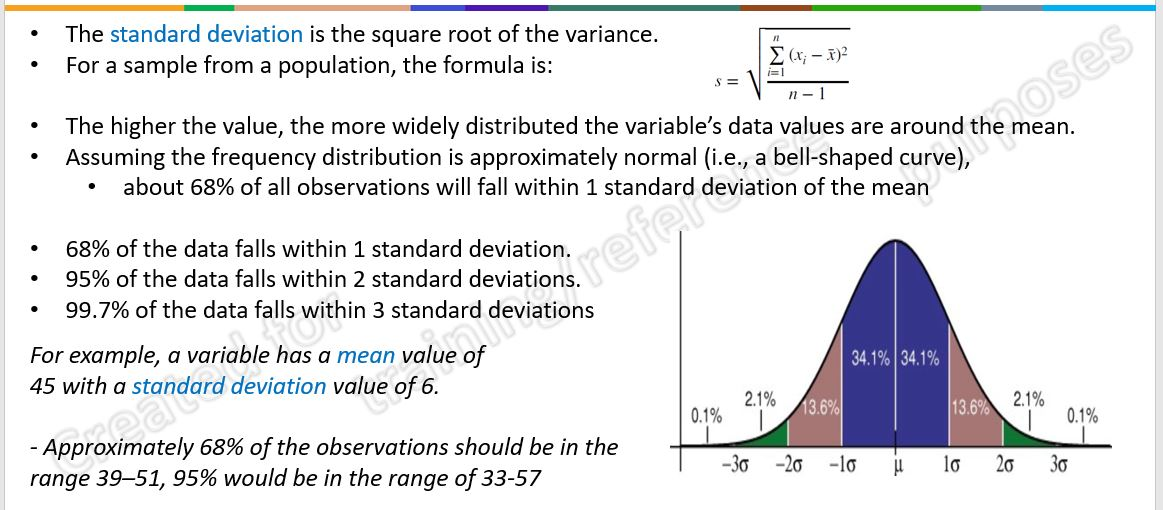

In [31]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\stats-27.JPG', width=800)

In [16]:
print('Std dev  of preTestScore column : ', df['preTestScore'].std())

Std dev  of preTestScore column :  13.663820841916802


##### Range and Interquartile range

In [17]:
print('Range of preTestScore column : ', df['preTestScore'].max() - df['preTestScore'].min())

Range of preTestScore column :  29


In [18]:
df['preTestScore'].quantile([.25, .50, .75])

0.25     3.0
0.50     4.0
0.75    24.0
Name: preTestScore, dtype: float64

In [19]:
IQR = df['preTestScore'].quantile(.75) - df['preTestScore'].quantile(.25)
IQR

21.0

##### `Skewness` — symmetry of data along with mean value

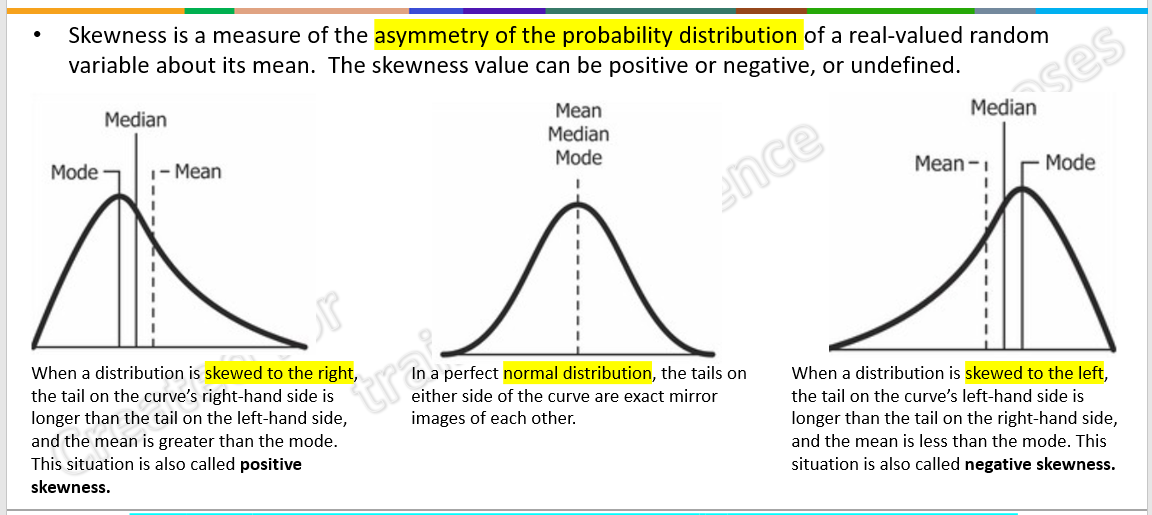

In [31]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\pd-stats-00.PNG', width=800)

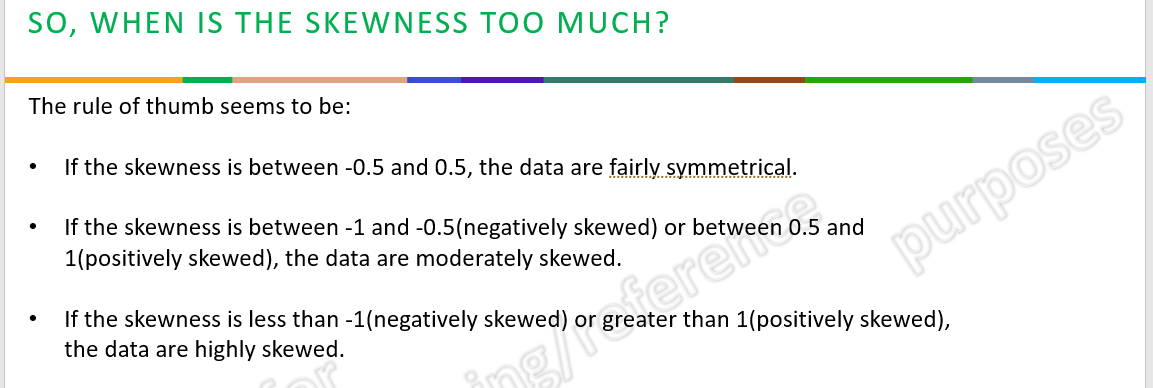

In [32]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\pd-stats-01.PNG', width=800)

In [41]:
print('Skewness of preTestScore column : ', df['preTestScore'].skew())

Skewness of preTestScore column :  0.7433452457326751


##### `Kurtosis` — peakedness of data at mean value

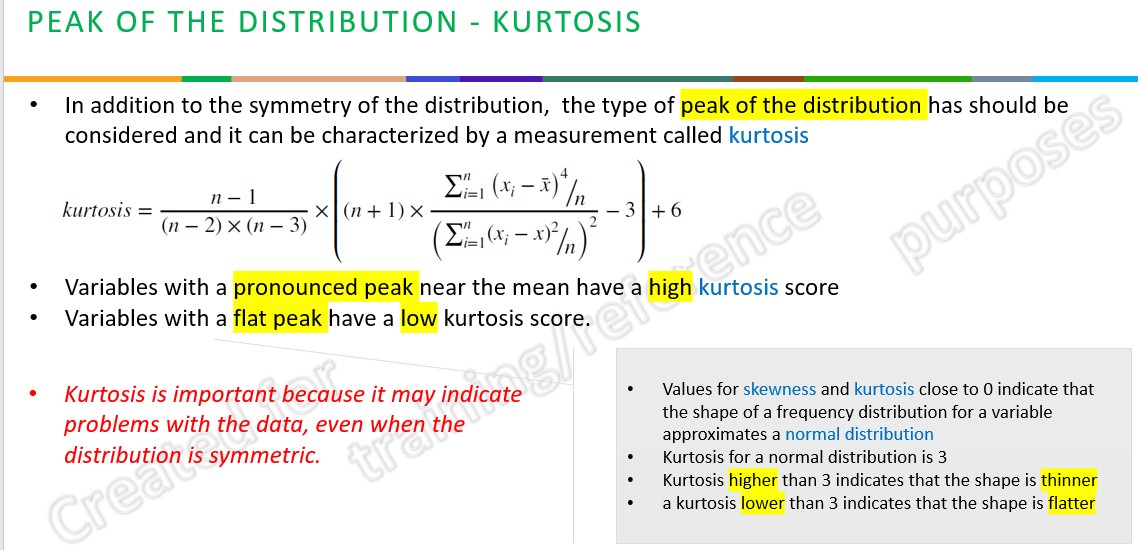

In [55]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\pd-stats-02.PNG', width=800)

In [42]:
print('Kurtosis of preTestScore column : ', df['preTestScore'].kurt())

Kurtosis of preTestScore column :  -2.4673543738411547


#### Index of min/max values
The idxmin() and idxmax() functions on Series and DataFrame compute the index labels with the minimum and maximum corresponding values:

In [66]:
s1 = pd.Series(np.random.randn(5))
s1

0   -0.408190
1    0.220474
2    0.113671
3    1.263373
4    1.683361
dtype: float64

In [67]:
s1.idxmin(), s1.idxmax()

(0, 4)

In [68]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=["A", "B", "C"])
df1

,A,B,C
0,-0.697694,-2.036675,1.745538
1,0.804754,-0.988826,2.220697
2,2.405827,-0.517599,1.324691
3,-0.742976,-0.243320,0.131033
4,-0.150091,-1.037134,1.670028


In [71]:
df1.idxmin(axis=0)

A    3
B    0
C    3
dtype: int64

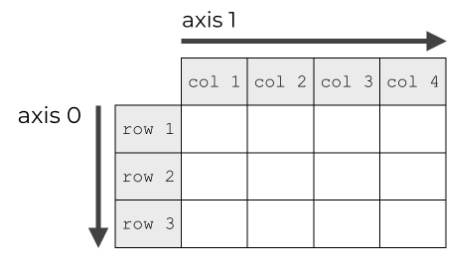

In [72]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\np-14.PNG', width=300)

So when we say axis=0, the operation is downwards, essentially it performs the operation column wise

In [73]:
df1.idxmin(axis=1)

0    B
1    B
2    B
3    A
4    B
dtype: object

> When there are `multiple rows` (or columns) matching the `minimum` or `maximum` value, `idxmin()` and `idxmax()` return the `first` matching index:

In [74]:
df3 = pd.DataFrame([2, 1, 1, 3, np.nan], columns=["A"], index=list("edcba"))
df3

,A
e,2.0
d,1.0
c,1.0
b,3.0
a,NaN


In [77]:
df3["A"].idxmin(axis=0)   # OR df3["A"].idxmin()

'd'

_Note_

> `idxmin` and `idxmax` are called `argmin` and `argmax` in NumPy.

#### Value counts (histogramming) / mode

`value_counts`(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

- Parameters
    - All the parameters are optional.

        - `normalize`: boolean, default False. If True, then the object returned will contain the relative frequencies of the unique values.

        - `sort`: boolean, default True. It sorts by values

        - `ascending`: boolean, default False. It sorts in ascending order

        - `bins`: integer, optional. Rather than count values, group them into half-open bins, a convenience for pd.cut only works with numeric data

In [20]:
data = np.random.randint(0, 7, size=50)

In [22]:
s = pd.Series(data)

In [23]:
s.value_counts()

6    12
1     9
0     7
4     6
2     6
5     5
3     5
dtype: int64

the output data is by default sorted from `high to low` . Set sort=False, if you do not want the order

In [86]:
s.value_counts(normalize=True, ascending=True)

1    0.06
0    0.12
3    0.12
2    0.16
4    0.16
6    0.16
5    0.22
dtype: float64